# Introduction

This notebook using is using YOLO V7 from https://github.com/WongKinYiu/yolov7 for object detection.
Was last tested on a ml.g4dn.xlarge instance running the Python 3 (Data Science image) kernel in SageMaker Studio.

notebook source: https://www.kaggle.com/code/taranmarley/yolo-v7-object-detection

In [2]:
!pip install opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 23.0 MB/s eta 0:00:0000:0100:01


In [3]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 4.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.6 MB/s eta 0:00:00


In [5]:
# run this command on terminal if error appear on notebook
!apt-get update && apt-get install libgl1 -y

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1 is already the newest version (1.1.0-1).
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

In [7]:
%matplotlib inline

# Look at Some Images

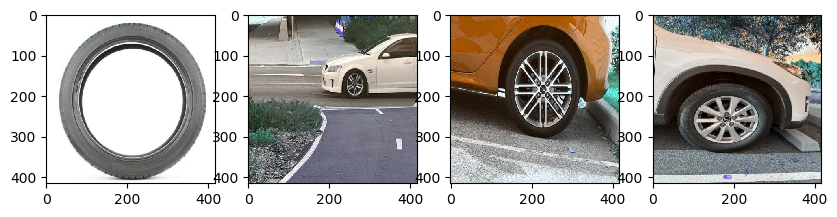

In [8]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("../input/sptire/train/images/14_19_l_jpg.rf.8323d9f848377e32ca451017a3a80731.jpg")
ax[0].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0719_JPEG.rf.05f197445c4a42854e0b1f308fb4e636.jpg")
ax[1].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0680_JPEG.rf.560c49e01182db8356989ddc604557fb.jpg")
ax[2].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0701_JPEG.rf.d5ae66ab383142ef5d59b0454a19fdce.jpg")
ax[3].imshow(image)
fig.show()

# Create the File System

In [9]:
%cd ../
!mkdir tmp
%cd tmp

/root/test-yolov7
mkdir: cannot create directory ‘tmp’: File exists
/root/test-yolov7/tmp


# Download YoloV7

In [10]:
# Download YOLOv7
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.32 MiB | 43.56 MiB/s, done.
Resolving deltas: 100% (514/514), done.
Checking out files: 100% (104/104), done.
/root/test-yolov7/tmp/yolov7
Note: you may need to restart the kernel to use updated packages.
/root/test-yolov7/tmp
Setup complete. Using torch 1.13.1+cu117 (Tesla T4)


# New YAML file

Create new Yaml file to fit the file system. 

In [11]:
#change /root/test-yolov7/tmp with your current working directory
%cp -r ../input/sptire /root/test-yolov7/tmp

In [12]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '../sptire/train',
    val = '../sptire/valid',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [13]:
%cd yolov7

/root/test-yolov7/tmp/yolov7


# Train the YoloV7 Model

In [14]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml  --weights 'yolov7.pt'

W&B disabled.
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu117 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='../data.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.

# Look at Training Results

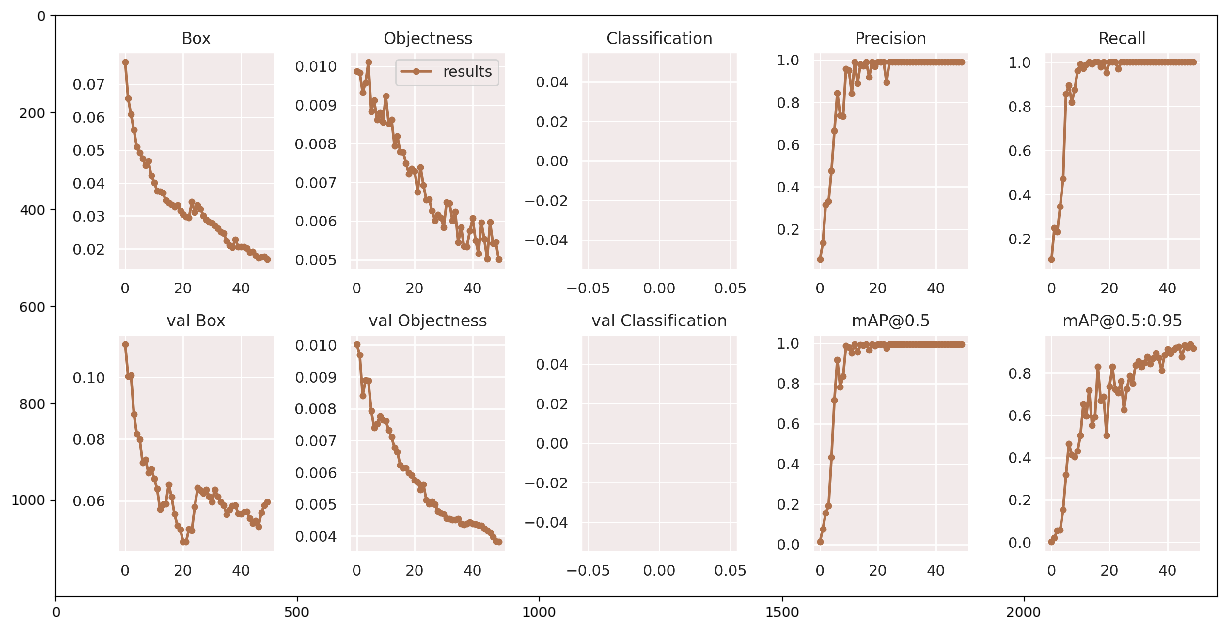

In [15]:
img = cv.imread("runs/train/exp/results.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)

# Model Validation Output

Let's look at how the model performed on a validation batch

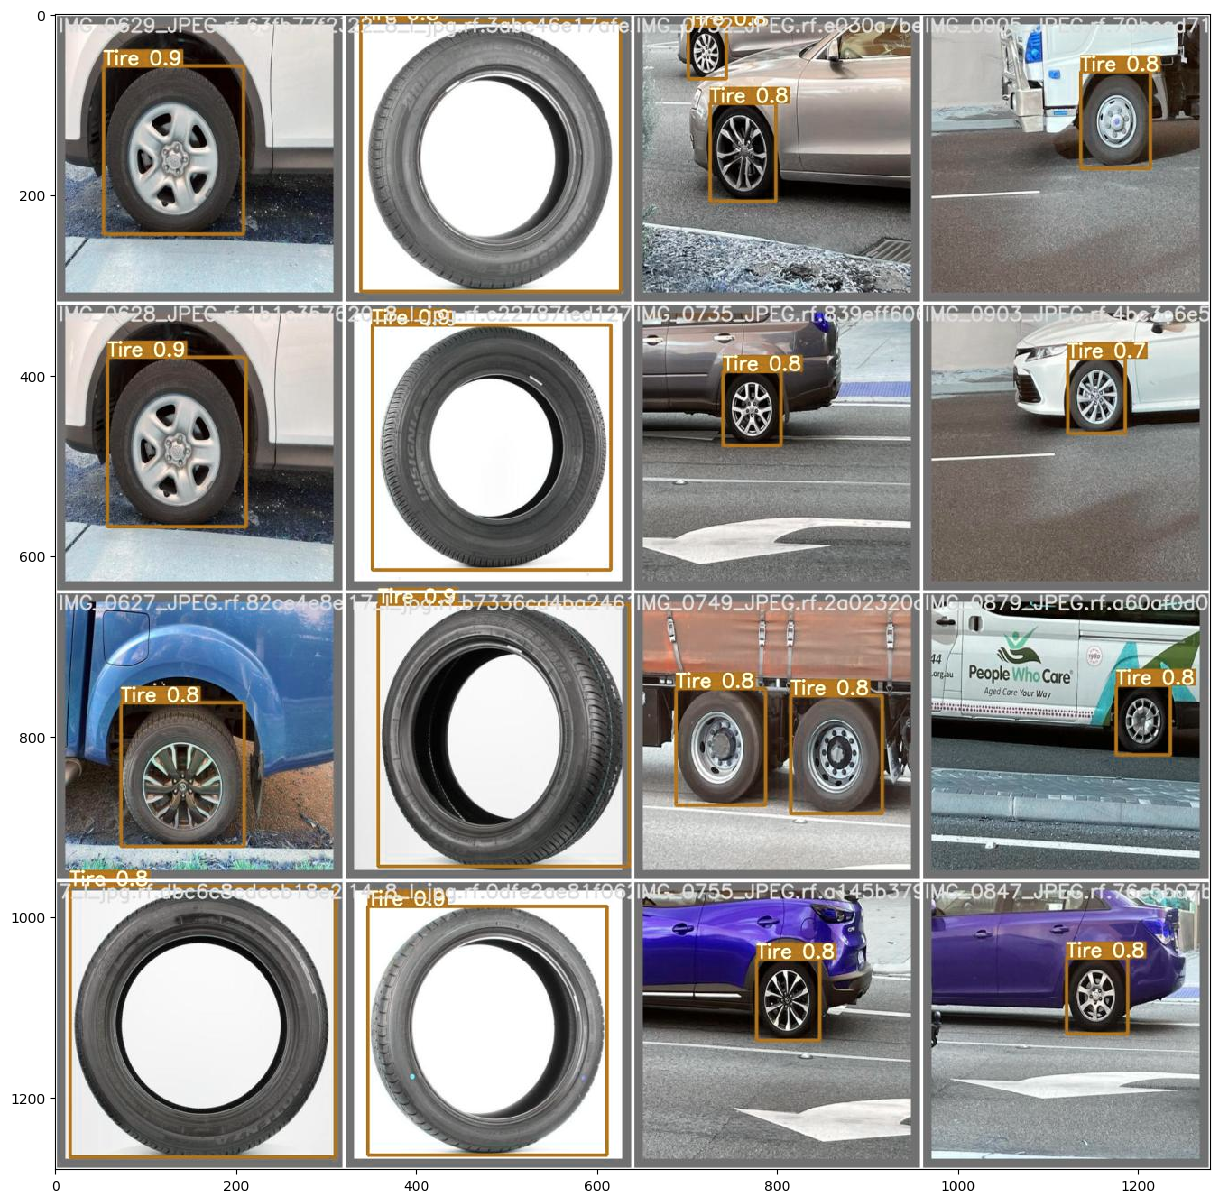

In [16]:
img = cv.imread("runs/train/exp/test_batch2_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [17]:
!python detect.py --source ../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg --weights runs/train/exp/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu117 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/opt/conda/lib/python3.7/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 t

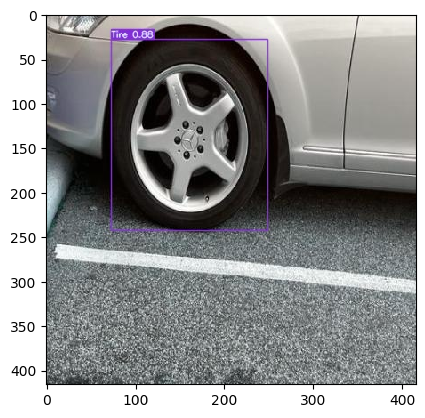

In [18]:
img = cv.imread("runs/detect/exp/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg")
plt.imshow(img)